1. 导入数据+查看原始数据信息

In [26]:
import mne
data_path = r'D:\work\data\BCICIV_2a_gdf\A01T.gdf'
raw = mne.io.read_raw_gdf(data_path, preload=True)
'''
# MNE-Python 中对多种格式的脑电数据都进行了支持：
# *** 如数据后缀为 .set (来自 EEGLAB 的数据)
# 使用 mne.io.read_raw_eeglab()

# *** 如数据后缀为 .vhdr (BrainVision 系统)
# 使用 mne.io.read_raw_brainvison()

# *** 如数据后缀为 .edf
# 使用 mne.io.read_raw_edf()

# *** 如数据后缀为 .bdf (BioSemi放大器)
# 使用 mne.io.read_raw_bdf()

# *** 如数据后缀为 .gdf
# 使用 mne.io.read_raw_gdf()

# *** 如数据后缀为 .cnt (Neuroscan系统)
# 使用 mne.io.read_raw_cnt()

# *** 如数据后缀为 .egi 或 .mff
# 使用 mne.io.read_raw_egi()

# *** 如数据后缀为 .data
# 使用 mne.io.read_raw_nicolet()

# *** 如数据后缀为 .nxe (Nexstim eXimia系统)
# 使用 mne.io.read_raw_eximia()

# *** 如数据后缀为 .lay 或 .dat (Persyst系统)
# 使用 mne.io.read_raw_persyst()

# *** 如数据后缀为 .eeg (Nihon Kohden系统)
# 使用 mne.io.read_raw_nihon()
'''
print(raw)
print(raw.info)

Extracting EDF parameters from D:\work\data\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


f:\Program Files\Python\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>


2. 绘制原始数据波形图

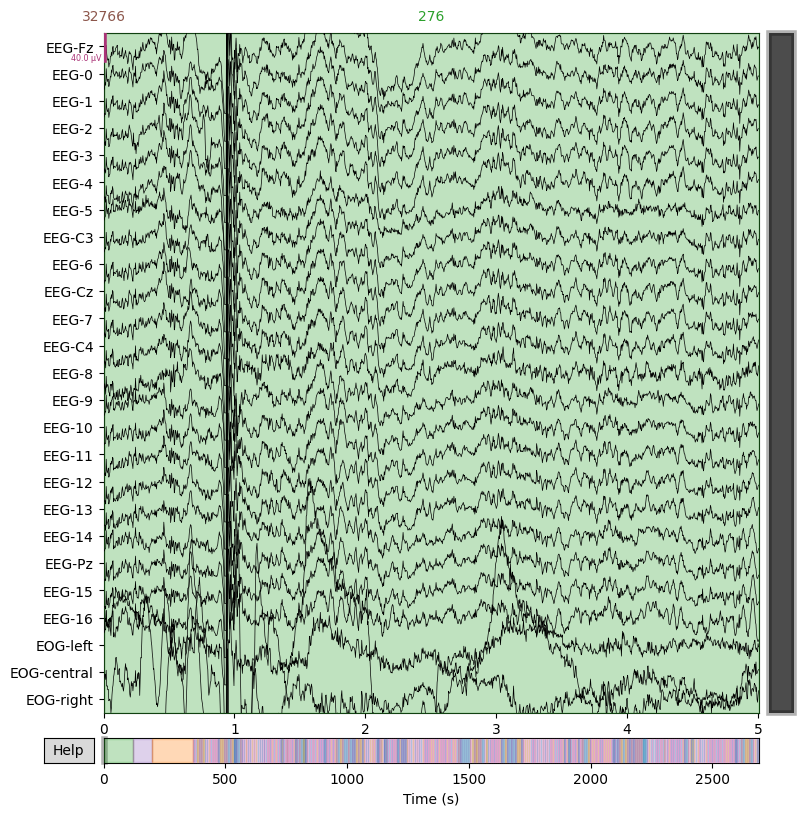

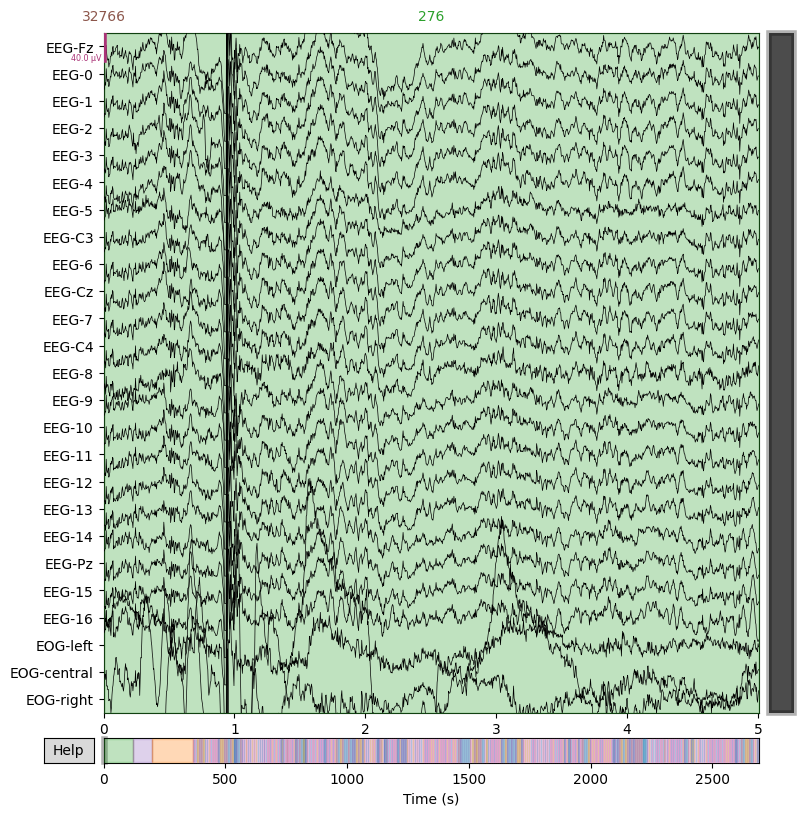

In [27]:
raw.plot(duration=5, n_channels=255, clipping=None)

3. 绘制原始数据功率谱图

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\PC\AppData\Local\Temp\ipykernel_15396\2597092655.py:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = psd.plot(average=True)
f:\Program Files\Python\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


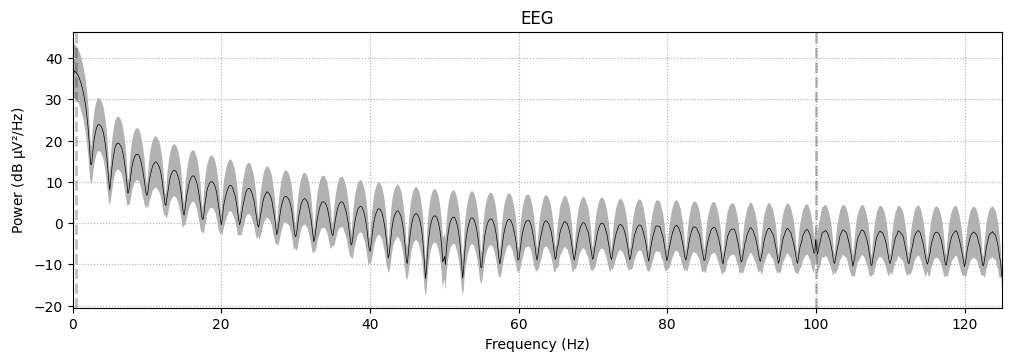

In [28]:
import matplotlib.pyplot as plt

psd = raw.compute_psd()
fig = psd.plot(average=True)
plt.show()

# 通过功率谱图可以看到哪个Hz处可能存在环境噪音
# 注意：在大多数欧亚国家采集的数据一般工频会出现在50Hz处，北美和一些南美国家则是60Hz


4. 数据预处理

In [29]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data
raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz(alpha, beta, theta)
raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the dataset into 288 events for all 4 classes
tmin, tmax = 2, 6  # static data(2~3s) for reference

# left_hand = 769, right_hand = 770, foot = 771, tongue = 772
event_id = dict({'769': 7, '770': 8, '771': 9, '772': 10})

# Pack data into epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1001 original time points ...
1 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [30]:
print(epochs)  # 检查掉的epochs是哪个动作

<Epochs |  287 events (all good), 2 – 6 s, baseline off, ~48.2 MB, data loaded,
 '769': 71
 '770': 72
 '771': 72
 '772': 72>


In [31]:
epochs_data = epochs.get_data()
print(epochs_data.shape)  # 样本数， 通道数， 每个通道的数据点（含表头）
print(epochs_data)
type(epochs_data)  # check types

(287, 22, 1001)
[[[-7.02926748e-07  2.19795206e-06  4.99787523e-06 ... -1.14062620e-06
   -1.10598477e-06 -2.00048790e-06]
  [-2.48165705e-06 -2.96485770e-07  1.95355889e-06 ... -9.67021958e-08
   -1.01584066e-06 -2.11646425e-06]
  [-2.05446426e-06  2.66939569e-07  2.29708045e-06 ... -9.12845340e-07
   -8.92614603e-07 -1.21654101e-06]
  ...
  [ 4.93459638e-06  6.39965491e-06  6.35067840e-06 ... -1.70122209e-06
   -1.53038041e-06 -7.46638810e-07]
  [ 6.87588249e-06  8.10916793e-06  7.82909276e-06 ... -1.63229623e-06
   -1.75570135e-06 -1.28757787e-06]
  [ 7.63722870e-06  8.99476364e-06  7.92748402e-06 ... -4.81544209e-07
    1.44907140e-08  1.33754764e-06]]

 [[ 1.52470557e-05  1.37280587e-05  1.06564182e-05 ...  1.42746040e-06
    7.18028644e-07  5.17902655e-07]
  [ 1.34992819e-05  1.33038255e-05  1.08458037e-05 ...  2.99347200e-06
    2.89449394e-06  2.36255785e-06]
  [ 1.51887249e-05  1.45563606e-05  1.12373347e-05 ...  2.35007854e-06
    1.59066732e-06  7.33319199e-07]
  ...
  [ 6.0

C:\Users\PC\AppData\Local\Temp\ipykernel_15396\627903781.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data = epochs.get_data()


numpy.ndarray

In [32]:
# 去掉表头
data = epochs_data[:, :, :-1]
print(data.shape)

(287, 22, 1000)


In [33]:
import numpy as np
# 保存数据
#BCI_IV_2a_data = np.savetxt('D:/work/data/BCICIV_2a_EEGNet/EEG-TCNet/MI-EEG-A01T.csv', data, delimiter=',')
BCI_IV_2a_data = np.save('D:\work\data\BCICIV_2a_EEGNet\EEG-TCNet\MI-EEG-A01T.npy', data)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\PC\AppData\Local\Temp\ipykernel_15396\1709551592.py:4: SyntaxWarning: invalid escape sequence '\w'
  BCI_IV_2a_data = np.save('D:\work\data\BCICIV_2a_EEGNet\EEG-TCNet\MI-EEG-A01T', data)


5. 建立CNN模型处理EEG数据

[代码步骤](./EEG_TCNet_Train_test_BCI_2A.py)